<h2>Training an image classifier</h2?

<h3>1. Loading and normalizing CIFAR10</h3>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

# The output of torchvision datasets are PILImage images of 
# range [0, 1]

In [2]:
transform = transforms.Compose(
    # Convert a ``PIL Image`` or ``numpy.ndarray`` to tensor.
    [transforms.ToTensor(),
     # Given mean: ``(M1,...,Mn)`` and std: ``(S1,..,Sn)``
     # for ``n`` channels, this transform will normalize each channel 
     # of the input ``torch.*Tensor`` i.e.
     # ``input[channel] = (input[channel] - mean[channel]) / std[channel]``
     transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])

# imgs should be unnormalized to be displayed!

In [3]:
trainset = torchvision.datasets.CIFAR10(root="./data", train=True, 
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, 
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root="./data", train=False,
                                      download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=10,
                                        shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


 frog   ship   bird    dog    dog    dog    cat   deer   deer    cat 


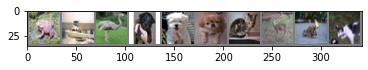

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img * 0.5 + 0.5  # unnormalize!
    
    npimg = img.numpy()
    npimg = np.transpose(npimg, (1, 2, 0))
    
    plt.imshow(npimg)
    
# gets some random training images
dataiter = iter(trainloader)
# gets two tensors (imgs, labels)
# numbers in label are indices in the classes tuple
images, labels = dataiter.next()

# shows images
# torchvision.utils.make_grid() makes imgs a long img
imshow(torchvision.utils.make_grid(images, nrow=10))
# prints labels
print(" ".join("%5s " % classes[labels[j]] for j in range(10)))

<h3>2. Define a Convolutional Neural Network</h2>

In [11]:
import torch.nn as nn
import torch.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        z1 = self.conv1(x)
        a1 = F.relu(z1)
        a1 = F.pool_max2d(a1, 2)
        
        z2 = self.conv2(a1)
        a2 = F.relu(z2)
        a2 = F.pool_max2d(a2, 2)
        a2 = a2.view(-1, 16 * 5 * 5)
        
        z3 = self.fc1(a2)
        a3 = F.relu(z3)
        
        z4 = self.fc2(a3)
        a4 = F.relu(z4)
        
        a5 = self.fc3(a4)
        
        return a5
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
